## 1. Linear Regression

### 1.1. Linear Regression from Scratch

In [1]:
# a sample
x = 2
y = 18

In [2]:
# init weights
w = 2
b = 2

In [3]:
# forward
def predict(x, w, b):
    return x*w + b

y_hat = predict(x, w, b)
y_hat

6

In [4]:
# compute loss
def compute_loss(y_hat, y):
    return (y_hat-y)*(y_hat-y)

loss = compute_loss(y_hat, y)
loss

144

In [5]:
# compute gradient
def compute_gradient(x, y, y_hat):
    dw = 2*x*(y_hat-y)
    db = 2*(y_hat-y)
    return dw, db

dw, db = compute_gradient(x, y, y_hat)
dw, db

(-48, -24)

In [6]:
# update weights
lr = 0.1

def update_weights(w, b, dw, db, lr):
    new_w = w - lr*dw
    new_b = b - lr*db
    return new_w, new_b

new_w, new_b = update_weights(w, b, dw, db, lr)
new_w, new_b

(6.800000000000001, 4.4)

In [13]:
X = [2, 3]
Y = [18, 22]

w = 2
b = 2
lr = 0.1
num_epochs = 50

losses = []
for epoch in range(num_epochs):
    epoch_loss = []
    for x, y in zip(X, Y):
        # compute y_hat
        y_hat = predict(x, w, b)

        # comepute loss
        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)
        
        # compute gradient 
        dw, db = compute_gradient(x, y, y_hat)

        # update weights
        w, b = update_weights(w, b, dw, db, lr)
    losses.append(sum(epoch_loss)/(len(epoch_loss)))

In [8]:
losses

[75.92000000000002,
 11.29587200000002,
 10.410275635200012,
 9.594110025400315,
 8.841931799408947,
 8.148724346335278,
 7.509864357582607,
 6.92109099194811,
 6.378477458179368,
 5.878404825458128,
 5.417537887142192,
 4.992802916790248,
 4.601367168113899,
 4.240619982133755,
 3.9081553755344727,
 3.6017559940925863,
 3.3193783241557275,
 3.059139063541913,
 2.819302560960223,
 2.5982692401809437,
 2.3945649317507636,
 2.2068310411015024,
 2.033815487479149,
 1.8743643532607797,
 1.7274141879651297,
 1.5919849156286552,
 1.4671732982433652,
 1.3521469116610885,
 1.2461385937868577,
 1.1484413280339658,
 1.0584035279161135,
 0.9754246913274879,
 0.89895139552741,
 0.8284736061180605,
 0.7635212753984058,
 0.7036612074071742,
 0.6484941687464483,
 0.5976522259167223,
 0.5507962914048607,
 0.5076138621587182,
 0.46781693536547364,
 0.43114008763282075,
 0.3973387047624064,
 0.36618735030903005,
 0.3374782620447993,
 0.31101996630048917,
 0.2866360009425347,
 0.26416373846864233,
 0.243

In [14]:
w, b

(4.151533425775712, 9.166566158233588)

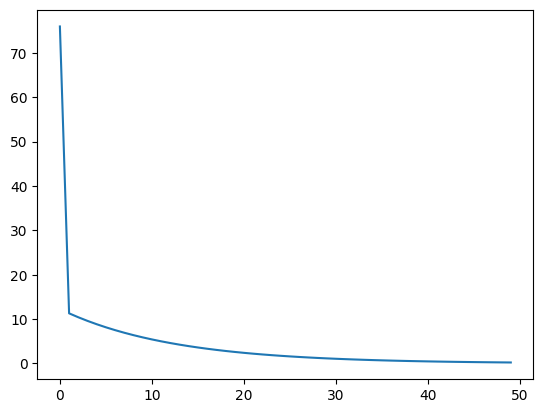

In [15]:
import matplotlib.pyplot as plt 
plt.plot(losses)

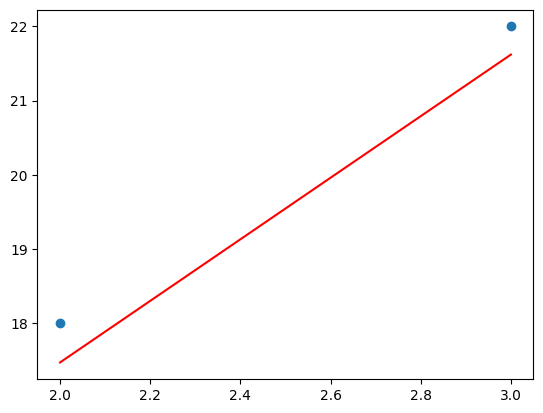

In [17]:
y_pred = [x*w + b for x in X]
plt.plot(X, y_pred, 'r')
plt.scatter(X, Y)

### 1.2. Linear Regression using numpy

In [18]:
import numpy as np

x = np.array([[2]])
y = np.array([18])

x, y

(array([[2]]), array([18]))

In [19]:
num_samples = x.shape[0]
num_samples

1

In [21]:
# append bias
x = np.hstack([x, np.ones((num_samples, 1))])
x

array([[2., 1.]])

In [22]:
# init weights
theta = np.array([2, 2]) # num_features: x.shape[1]
theta

array([2, 2])

In [23]:
# forward
def predict(x, theta):
    return x.dot(theta)

y_hat = predict(x, theta)
y_hat

array([6.])

In [24]:
# compute loss
def compute_loss(y_hat, y):
    return (y_hat-y)*(y_hat-y)

loss = compute_loss(y_hat, y)
loss

array([144.])

In [25]:
# compute gradient
def compute_gradient(x, y, y_hat):
    d_theta = 2*x*(y_hat-y)
    return d_theta

d_theta = compute_gradient(x, y, y_hat)
d_theta

array([[-48., -24.]])

In [26]:
# update weights
lr = 0.1

def update_weights(theta, d_theta, lr):
    new_theta = theta - lr*d_theta
    return new_theta

new_theta = update_weights(theta, d_theta, lr)
new_theta

array([[6.8, 4.4]])

In [28]:
X = np.array([[2], [3]])
Y = np.array([18, 22])

X, Y

(array([[2],
        [3]]),
 array([18, 22]))

In [29]:
num_samples = X.shape[0]
# append bias
X = np.hstack([X, np.ones((num_samples, 1))])
num_samples, X

(2,
 array([[2., 1.],
        [3., 1.]]))

In [30]:
# init weights
theta = np.array([2, 2]) # num_features: x.shape[1]
theta

array([2, 2])

In [31]:
X[0]

array([2., 1.])

In [32]:
lr = 0.1
num_epochs = 50

losses = []
for epoch in range(num_epochs):
    epoch_loss = []
    for i in range(num_samples):
        x = X[i]
        y = Y[i]
        # compute y_hat
        y_hat = predict(x, theta)

        # comput loss
        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)

        # compute gradient
        d_theta = compute_gradient(x, y, y_hat)

        # update weights
        theta = update_weights(theta, d_theta, lr)
    losses.append(sum(epoch_loss)/len(epoch_loss))

In [33]:
losses

[75.92000000000002,
 11.29587200000002,
 10.410275635200012,
 9.594110025400315,
 8.841931799408947,
 8.148724346335278,
 7.509864357582607,
 6.92109099194811,
 6.378477458179368,
 5.878404825458128,
 5.417537887142192,
 4.992802916790248,
 4.601367168113899,
 4.240619982133755,
 3.9081553755344727,
 3.6017559940925863,
 3.3193783241557275,
 3.059139063541913,
 2.819302560960223,
 2.5982692401809437,
 2.3945649317507636,
 2.2068310411015024,
 2.033815487479149,
 1.8743643532607797,
 1.7274141879651297,
 1.5919849156286552,
 1.4671732982433652,
 1.3521469116610885,
 1.2461385937868577,
 1.1484413280339658,
 1.0584035279161135,
 0.9754246913274879,
 0.89895139552741,
 0.8284736061180605,
 0.7635212753984058,
 0.7036612074071742,
 0.6484941687464483,
 0.5976522259167223,
 0.5507962914048607,
 0.5076138621587182,
 0.46781693536547364,
 0.43114008763282075,
 0.3973387047624064,
 0.36618735030903005,
 0.3374782620447993,
 0.31101996630048917,
 0.2866360009425347,
 0.26416373846864233,
 0.243

In [34]:
theta

array([4.15153343, 9.16656616])

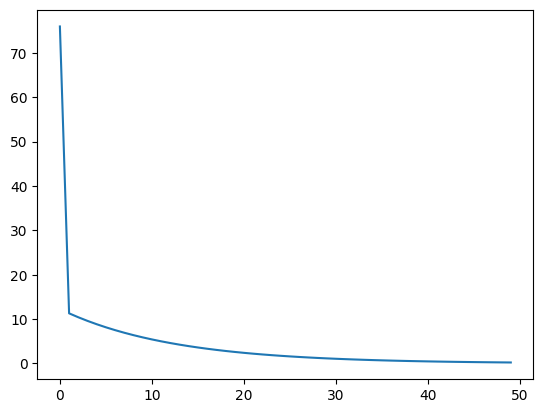

In [35]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [36]:
theta[0], theta[1]

(4.151533425775712, 9.166566158233588)

In [37]:
X

array([[2., 1.],
       [3., 1.]])

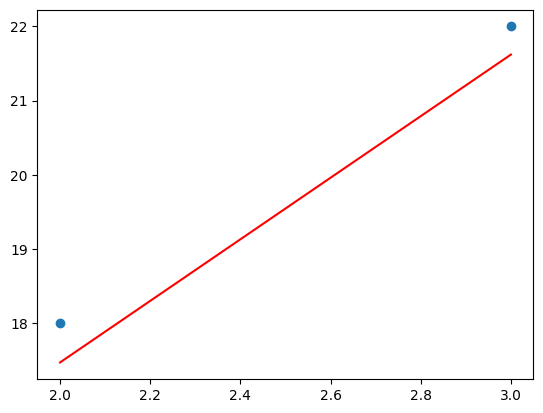

In [38]:
X_old = [2, 3]
Y_old = [18, 22]
Y_pred = [x*theta[0] + theta[1] for x in X_old]
plt.plot(X_old, Y_pred, 'r')
plt.scatter(X_old, Y_old)

## 2. Logistic Regression

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1. Logistic Regression from Scratch

**Sample 1**

In [40]:
X = np.array([[1.0, 0.5]])
y = np.array([0])

X, y

(array([[1. , 0.5]]), array([0]))

In [41]:
theta = np.array([0.1, 0.1])
theta

array([0.1, 0.1])

In [42]:
z = np.dot(X, theta)
z

array([0.15])

In [43]:
# define logistic function
def logistic_function(x):
    return 1/(1 + np.exp(-x))

In [44]:
y_hat = logistic_function(z)
y_hat

array([0.53742985])

In [45]:
loss = (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))
loss

array([-0.77095705])

In [46]:
gradient = np.dot(X.transpose(), (y_hat - y))
gradient

array([0.53742985, 0.26871492])

In [47]:
learning_rate = 0.1
theta -= (learning_rate * gradient)
theta

array([0.04625702, 0.07312851])

In [48]:
z = np.dot(X , theta)
z

array([0.08282127])

In [49]:
y_hat = logistic_function(z)
y_hat

array([0.52069349])

In [50]:
loss = (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))
loss

array([-0.73541499])

**Sample 2**

In [52]:
X = np.array([[1.0, 1.0]])
y = np.array([0])

In [53]:
z = np.dot(X , theta)
z

array([0.11938552])

In [54]:
y_hat = logistic_function(z)
y_hat

array([0.52981098])

In [55]:
loss = (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))
loss

array([-0.7546205])

In [56]:
gradient = np.dot(X.transpose(), (y_hat - y))
gradient

array([0.52981098, 0.52981098])

In [57]:
learning_rate = 0.1
theta -= (learning_rate * gradient)
theta

array([-0.00672408,  0.02014741])

**Prediction**

In [58]:
X_test = np.array([1.0, 0.25])
z = np.dot(X_test , theta)
y_hat = logistic_function(z)
z, y_hat

(-0.0016872302830703532, 0.49957819252929725)

In [59]:
X_test = np.array([1.0, 4.5])
z = np.dot(X_test , theta)
y_hat = logistic_function(z)
z, y_hat

(0.0839392604629279, 0.5209725025576125)

**Sample 3**

In [60]:
import numpy as np

In [61]:
x = np.array([1.0, 1.0, 0.5])
y = np.array([0])
x, y

(array([1. , 1. , 0.5]), array([0]))

In [62]:
theta = np.array([0.1, 0.2, 0.1])
theta

array([0.1, 0.2, 0.1])

In [63]:
 # forward
def predict(x, theta):
    z = np.dot(x, theta)
    y_hat = logistic_function(z)
    return z, y_hat

z, y_hat = predict(x, theta)
z, y_hat

(0.35000000000000003, 0.5866175789173301)

In [64]:
# comput loss
def compute_loss(y_hat, y):
    loss = -1*((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)))
    return loss

loss = compute_loss(y_hat, y)
loss

array([0.88338216])

In [65]:
# compute gradient
def compute_gradient(x, y_hat, y):
    gradient = x*(y_hat - y)
    return gradient

gradient = compute_gradient(x, y_hat, y)
gradient

array([0.58661758, 0.58661758, 0.29330879])

In [66]:
# update weights
learning_rate = 0.1
def update_weight(gradient, theta, learning_rate):
    theta -= (learning_rate * gradient)
    return theta

theta = update_weight(gradient, theta, learning_rate)
theta

array([0.04133824, 0.14133824, 0.07066912])

**Prediction**

In [67]:
X_test = np.array([1.0, 2.0, 0.25])
z = np.dot(X_test , theta)
y_hat = logistic_function(z)
z, y_hat

(0.34168200658833436, 0.5845990444988789)

In [68]:
X_test = np.array([1.0, 1.0, 4.5])
z = np.dot(X_test , theta)
y_hat = logistic_function(z)
z, y_hat

(0.5006875289601347, 0.6226208894510787)

### 2.2.Logistic Regression using Numpy for One Sample

In [69]:
X = np.array([
    [1.0, 0.5],
    [2.0, 1.0],
    [3.0, 1.5],
    [2.0, 2.0],
    [1.0, 2.5],
    [2.0, 3.0],
    [1.0, 3.5],
    [2.0, 4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [70]:
X, Y

(array([[1. , 0.5],
        [2. , 1. ],
        [3. , 1.5],
        [2. , 2. ],
        [1. , 2.5],
        [2. , 3. ],
        [1. , 3.5],
        [2. , 4. ]]),
 array([0, 0, 1, 0, 0, 1, 1, 1]))

In [71]:
n_samples = X.shape[0]

In [72]:
# vector [1, X]
X = np.hstack([np.ones((n_samples, 1)), X])
X

array([[1. , 1. , 0.5],
       [1. , 2. , 1. ],
       [1. , 3. , 1.5],
       [1. , 2. , 2. ],
       [1. , 1. , 2.5],
       [1. , 2. , 3. ],
       [1. , 1. , 3.5],
       [1. , 2. , 4. ]])

In [73]:
X.shape

(8, 3)

In [74]:
n_features = X.shape[-1]
theta = np.random.rand(n_features)
theta

array([0.40661535, 0.25847319, 0.81454676])

In [77]:
def logistic_function(x):
    return 1/(1 + np.exp(-x))

def predict(x, theta):
    z = np.dot(x, theta)
    y_pred = logistic_function(z)
    return y_pred

def compute_cost(y_pred, y):
    cost = -1*((y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)))
    return cost

def compute_gradient(x, y, y_pred):
    gradient = np.dot(x.transpose(), (y_pred - y))
    return gradient

def update_weight(theta, lr, gradient):
    new_theta = theta - lr*gradient
    return new_theta

In [82]:
# param
n_epochs = 10
lr = 0.001

losses = []
for epoch in range(n_epochs):
  epoch_loss = []
  for i in range(n_samples):
    # get a sample
    x = X[i,:]
    y = Y[i]

    # predict y_hat
    y_pred = predict(x, theta)

    # compute loss
    loss = compute_cost(y_pred, y) 
    epoch_loss.append(loss)

    # compute gradient
    gradient = compute_gradient(x, y, y_pred)

    # update weights
    theta = update_weight(theta, lr, gradient)
  losses.append(sum(epoch_loss)/len(epoch_loss))

theta, losses

(array([0.28502793, 0.08311184, 0.63256861]),
 [0.905951700170173,
  0.9005330588680072,
  0.8951869568311931,
  0.8899134967624786,
  0.8847127549438463,
  0.8795847810005804,
  0.8745295977032306,
  0.8695472008082917,
  0.8646375589382903,
  0.8598006135018698])

In [83]:
losses

[0.905951700170173,
 0.9005330588680072,
 0.8951869568311931,
 0.8899134967624786,
 0.8847127549438463,
 0.8795847810005804,
 0.8745295977032306,
 0.8695472008082917,
 0.8646375589382903,
 0.8598006135018698]

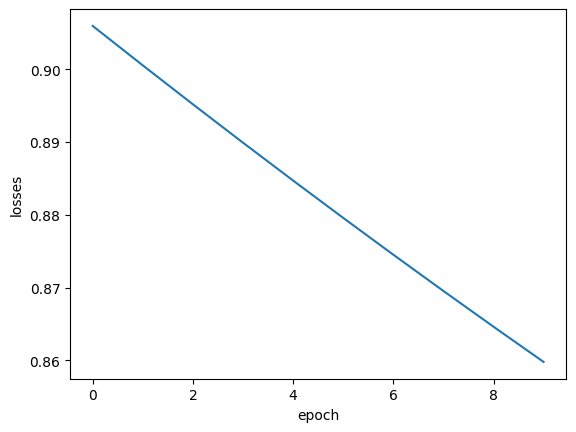

In [84]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [85]:
X_test = np.array([1.0, 2.0, 0.25])
predict(X_test, theta)

0.6478024963575452

In [86]:
X_test = np.array([1.0, 1.0, 4.5])
predict(X_test, theta)

0.9613836763554666

### 2.3.Logistic Regression for N Sample

In [87]:
X = np.array([
    [1.0, 0.5],
    [2.0, 1.0],
    [3.0, 1.5],
    [2.0, 2.0],
    [1.0, 2.5],
    [2.0, 3.0],
    [1.0, 3.5],
    [2.0, 4.0],
])
Y = np.array([0, 0, 1, 0, 0, 1, 1, 1])

In [88]:
n_samples = X.shape[0]

In [89]:
# vector [1, X]
X = np.hstack([np.ones((n_samples, 1)), X])
X

array([[1. , 1. , 0.5],
       [1. , 2. , 1. ],
       [1. , 3. , 1.5],
       [1. , 2. , 2. ],
       [1. , 1. , 2.5],
       [1. , 2. , 3. ],
       [1. , 1. , 3.5],
       [1. , 2. , 4. ]])

In [90]:
n_features = X.shape[-1]
theta = np.random.rand(n_features)
theta

array([0.76943791, 0.18565978, 0.48764904])

In [91]:
def logistic_function(x):
  return 1/ (1 + np.exp(-x))

def predict(x, theta):
  z = np.dot(x , theta)
  y_pred = logistic_function(z)
  return y_pred

def compute_cost(y_pred, y):
  m = len(y)
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
  cost = -1 / m * sum(error)
  return cost

def compute_gradient(x, y, y_pred):
  m = len(y)
  gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
  return gradient

def update_weight(theta, lr, gradient):
  new_theta = theta - lr*gradient
  return new_theta

In [92]:
# param
n_epochs = 10
lr = 0.001

losses = []
for epoch in range(n_epochs):
  # get all the samples
  x = X
  y = Y

  # predict y_hat
  y_pred = predict(x, theta)

  # compute loss
  loss = compute_cost(y_pred, y)
  losses.append(loss)

  # compute gradient
  gradient = compute_gradient(x, y, y_pred)

  # update weights
  theta = update_weight(theta, lr, gradient)

theta, losses

(array([0.76556838, 0.18006172, 0.48208147]),
 [1.0106628697437698,
  1.009884842079717,
  1.0091079721462899,
  1.0083322607700005,
  1.0075577087711045,
  1.0067843169635813,
  1.0060120861551052,
  1.0052410171470274,
  1.0044711107343505,
  1.0037023677057062])

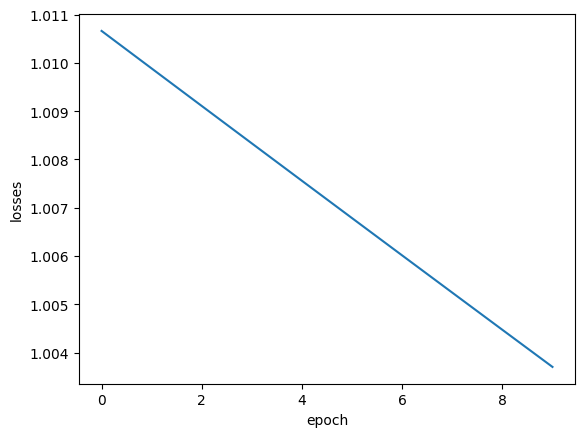

In [93]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [94]:
X_test = np.array([1.0, 2.0, 0.25])
predict(X_test, theta)

0.7766434834700083

In [95]:
X_test = np.array([1.0, 1.0, 4.5])
predict(X_test, theta)

0.9575071234095426

## 3.Classification using Logistic Regression

In [96]:
import numpy as np
import pandas as pd

In [97]:
data = pd.read_csv("data.csv")
data.head()

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Width   100 non-null    float64
 1   Length  100 non-null    float64
 2   Result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [99]:
X = data[['Width', 'Length']].values
Y = data['Result'].values

In [100]:
X.shape, Y.shape

((100, 2), (100,))

In [101]:
n_samples = X.shape[0]
n_samples

100

In [102]:
# vector [1, X]
X = np.hstack([np.ones((n_samples, 1)), X])
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [103]:
n_features = X.shape[-1]
theta = np.random.rand(n_features)
theta

array([0.38474319, 0.71721531, 0.26307498])

In [104]:
def logistic_function(x):
  return 1/ (1 + np.exp(-x))

def predict(x, theta):
  z = np.dot(x , theta)
  y_pred = logistic_function(z)
  return y_pred

def compute_cost(y_pred, y):
  m = len(y)
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
  cost = -1 / m * sum(error)
  return cost

def compute_gradient(x, y, y_pred):
  m = len(y)
  gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
  return gradient

def update_weight(theta, lr, gradient):
  new_theta = theta - lr*gradient
  return new_theta

In [105]:
# param
n_epochs = 300
lr = 0.001

losses = []
for epoch in range(n_epochs):
  # get all the samples
  x = X
  y = Y

  # predict y_hat
  y_pred = predict(x, theta)

  # compute loss
  loss = compute_cost(y_pred, y)
  losses.append(loss)

  # compute gradient
  gradient = compute_gradient(x, y, y_pred)

  # update weights
  theta = update_weight(theta, lr, gradient)

theta, losses

C:\Users\vomin\AppData\Local\Temp\ipykernel_11172\3768480843.py:11: RuntimeWarning: divide by zero encountered in log
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
C:\Users\vomin\AppData\Local\Temp\ipykernel_11172\3768480843.py:11: RuntimeWarning: invalid value encountered in multiply
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))


(array([ 0.35581398,  0.00796466, -0.00230914]),
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  7.159554310825168,
  6.25764957623224,
  5.351232646240046,
  4.475465568413805,
  3.7005311567449373,
  3.077556777219423,
  2.6352527643569177,
  2.359273750530389,
  2.2103393745060833,
  2.1363217672925687,
  2.0922629268585093,
  2.055921115199426,
  2.0211030827608765,
  1.9866178330677593,
  1.9522792776331719,
  1.9180654322400401,
  1.8839787279257738,
  1.8500253111550915,
  1.8162122068187114,
  1.782546976655683,
  1.749037709298655,
  1.715693054355155,
  1.6825222643644273,
  1.6495352403708095,
  1.6167425807669877,
  1.584155633407535,
  1.5517865510536137,
  1.5196483501307692,
  1.4877549727084938,
  1.4561213515110363,
  1.4247634776310452,
  1.393698470436134,
  1.3629446489381989,
  1.3325216036057506,
  1.3024502672463854,
  1.2727529831458315,
  1.2434535681161831,
  1.2145773674666196,
  1.1861512981551832,
 

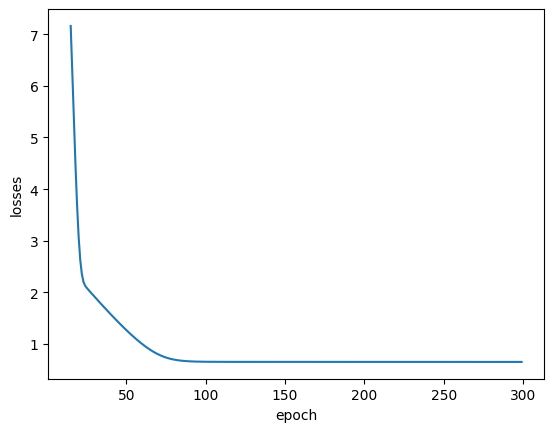

In [106]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [107]:
theta

array([ 0.35581398,  0.00796466, -0.00230914])

In [108]:
Y_preds = predict(X, theta)

In [109]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
accs = []
for threshold in thresholds:
  Y_pred_ths = []
  for y_pred in Y_preds:
    if y_pred >= threshold:
      Y_pred_ths.append(1)
    else:
      Y_pred_ths.append(0)

  Y_pred_ths = np.array(Y_pred_ths)
  acc = sum(Y == Y_pred_ths)/len(Y)
  accs.append(acc)
accs

[0.6, 0.6, 0.6, 0.62, 0.72, 0.54, 0.4, 0.4]